#Lets start

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('/content/Train.csv')

In [3]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


#Lets do preprocessing

In [4]:
data['availability_month']=data['availability'].str.split('-').str[1]

In [5]:
data['availability']=data['availability'].str.split('-').str[0]

In [6]:
data['availability']=data['availability'].replace(['18','19','20','21','17','22','16','15','14'],'soon')

In [7]:
data['availability'].value_counts(ascending=False)

Ready To Move           10581
soon                     2723
Immediate Possession       16
Name: availability, dtype: int64

In [8]:
data['size']=data['size'].str.split().str[0]

In [9]:
data['size'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', nan, '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

#There are lot values that conthain '-' and two values between like 2100-2500sqft so to convert that into normal this function will help me

In [10]:
def convert(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [11]:
data['total_sqft']=data['total_sqft'].apply(convert)

In [12]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_month
0,Super built-up Area,soon,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07,Dec
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,62.00,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00,NaN
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,51.00,NaN


In [13]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']

Now what i did here is the price in is lakhs what you are seeing 39.07lakhs so to see what is the price per sqft i have did this 

In [14]:
data.shape

(13320, 11)

In [15]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_month,price_per_sqft
0,Super built-up Area,soon,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07,Dec,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00,NaN,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,62.00,NaN,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00,NaN,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,51.00,NaN,4250.000000


In [16]:
data.isna().sum()

area_type                 0
availability              0
location                  1
size                     16
society                5502
total_sqft               46
bath                     73
balcony                 609
price                     0
availability_month    10597
price_per_sqft           46
dtype: int64

In [17]:
data['location']=data['location'].fillna(data['location'].mode()[0])
data['size']=data['size'].fillna(data['size'].mode()[0])
data['society']=data['society'].fillna('missing')
data['total_sqft']=data['total_sqft'].fillna(data['total_sqft'].mean())
data['bath']=data['bath'].fillna(data['bath'].mode()[0])
data['balcony']=data['balcony'].fillna(data['balcony'].mode()[0])
data=data.drop('availability_month',axis=1)
data['price_per_sqft']=data['price_per_sqft'].fillna(data['price_per_sqft'].mean())

In [18]:
data.isna().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


#Finding outlier with the help of boxplot

In [20]:
from scipy.stats import zscore

In [21]:
data1=data[['total_sqft','bath','balcony','price','price_per_sqft']]

In [22]:
df=data1.columns.values

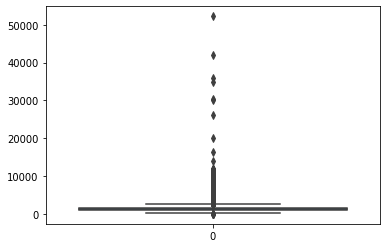

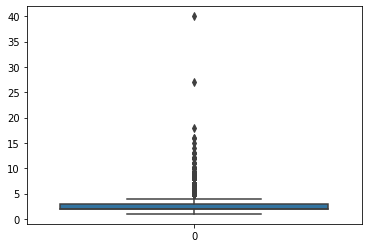

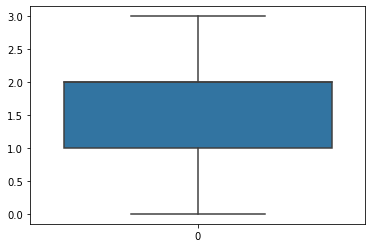

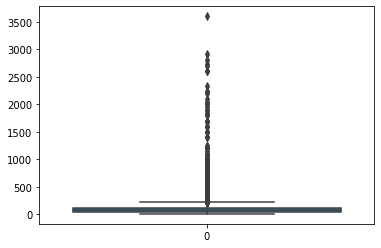

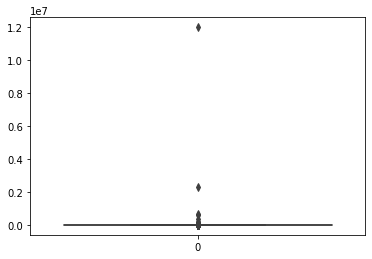

In [23]:
for i in data1:
  sns.boxplot(data=data[i])
  plt.show()

In [24]:
z=np.abs(zscore(data1))
df_new=data[(z<3).all(axis=1) & (z>-3).all(axis=1)]

In [25]:
print(data.shape)
print(df_new.shape)

(13320, 10)
(12858, 10)


In [26]:
df_new.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,soon,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,missing,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,missing,1200.0,2.0,1.0,51.00,4250.000000


In [27]:
df_new['area_type']=df_new['area_type'].str.replace('-','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
len(data['location'].unique())

1305

In [29]:
def onhot_encode(df,column):
  df=df.copy()
  dummies=pd.get_dummies(df[column],prefix=column)
  df=pd.concat([df,dummies],axis=1)
  df=df.drop(column,axis=1)
  return df

In [30]:
for column in ['area_type','availability','location','society']:
  df_new=onhot_encode(df_new,column)

In [31]:
df_new

,size,total_sqft,bath,balcony,price,price_per_sqft,area_type_Builtup Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super builtup Area,availability_Immediate Possession,availability_Ready To Move,availability_soon,location_ Anekal,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ Whitefield,location_ ittamadu,location_ south,location_1 Annasandrapalya,location_12th cross srinivas nagar banshankari 3rd stage,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Domlur,location_1st Stage Indira Nagar,location_1st Stage Radha Krishna Layout,location_2 Bedroom Furnished Farm House in Kolar Road,location_2nd Block Bel Layout,location_2nd Block Hbr Layout,...,society_ViistLa,society_Viium E,society_Villeka,society_Vimesar,society_Vincy R,society_VincyRe,society_Vincyat,society_Viockit,society_Viodspr,society_Viony H,society_ViortCo,society_Viowsen,society_Visic C,society_VisicCl,society_Visom B,society_Vitat H,society_Vithm R,society_Viuliap,society_Vixirri,society_VmlleRo,society_Vrensn,society_Vrenty,society_Wharl P,society_Whosone,society_Wiass G,society_Wiaysld,society_Wiowsri,society_WishiVa,society_WoarkEm,society_Xeitaa,society_YCnce R,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo,society_missing
0,2,1056.0,2.0,1.0,39.07,3699.810606,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,2600.0,5.0,3.0,120.00,4615.384615,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,2.0,3.0,62.00,4305.555556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,1521.0,3.0,1.0,95.00,6245.890861,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1200.0,2.0,1.0,51.00,4250.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,5,3453.0,4.0,0.0,231.00,6689.834926,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13316,4,3600.0,5.0,2.0,400.00,11111.111111,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13317,2,1141.0,2.0,1.0,60.00,5258.545136,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13318,4,4689.0,4.0,1.0,488.00,10407.336319,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [33]:
X=df_new.drop('price',axis=1)
y=df_new['price']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
rf.score(X_test,y_test)

0.9882046632028522

In [37]:
y_pred=rf.predict(X_test)

In [38]:
predict_data=pd.DataFrame(y_test)

In [39]:
predict_data['predicted_by_model']=y_pred

In [40]:
predict_data

,price,predicted_by_model
7575,55.0,54.9516
1640,62.0,61.6096
367,60.0,59.9160
1627,30.0,30.5163
3683,35.0,35.0247
...,...,...
6511,38.0,37.9560
5038,62.0,62.0300
9177,48.5,48.3029
9670,42.0,41.9284
